In [10]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ODE

## Ejercicio 1
$y'= -5y+5t^2+2t$
* $0 \le t \le 1$
* $y(t_0)=1/3$
* $N=10$



In [11]:
%autoreload 2
from src import ODE_euler, ODE_euler_nth
f = lambda t, y: -5*y + 5*t**2 + 2*t
y_t0 = 1/3

a = 0
b = 1

ys,ts, h = ODE_euler(a=a, b=b, y_t0=y_t0, f=f, N=10)
ys,h

([0.3333333333333333,
  0.16666666666666666,
  0.10833333333333334,
  0.11416666666666667,
  0.16208333333333336,
  0.2410416666666667,
  0.34552083333333333,
  0.4727604166666667,
  0.6213802083333333,
  0.7906901041666666,
  0.9803450520833332],
 0.1)

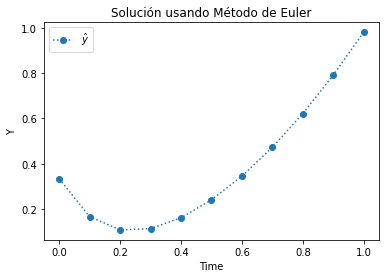

In [12]:
import matplotlib.pyplot as plt

plt.plot(ts, ys, marker="o", linestyle=":", label=r"$\hat{y}$")
plt.xlabel("Time")
plt.ylabel("Y")
plt.title("Solución usando Método de Euler")
plt.legend()
plt.show()

## Comparación con la solución real
La solución real de la ecuación diferencial es:
$y(t)=t^2 +1/3e^{-5t}$

* Grafique la solución real y la aproximación obtenida con el método de Euler y el de Taylor de 2do orden en una misma gráfica.



In [13]:
from math import exp

y_real = lambda t: t**2 + 1 / 3 * exp(-5 * t)

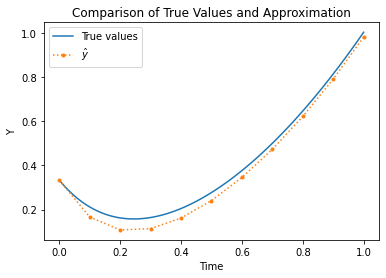

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# True values
t_true = np.linspace(a, b, 100)
y_true = [y_real(t) for t in t_true]  # type: ignore
plt.plot(t_true, y_true, label="True values")

# Approximation
plt.plot(ts, ys, marker=".", linestyle=":", label=r"$\hat{y}$")
plt.xlabel("Time")
plt.ylabel("Y")
plt.title("Comparison of True Values and Approximation")
plt.legend()
plt.show()

In [15]:
error = lambda y, y_hat: abs((y - y_hat) / y)
errors = []
for t, approx in zip(ts, ys):
    errors.append(error(y_real(t), approx))

sum(errors) / len(errors)

0.12909541068138491

# Método de Taylor

In [16]:
%autoreload 2
from src import ODE_euler_nth
f = lambda t, y: -5*y + 5*t**2 + 2*t
f_p = lambda t, y: -5*f(t,y) +10*t + 2
f_2p = lambda t, y: -5*f_p(t,y) + 10
f_3p = lambda t, y: -5*f_2p(t,y)
y_t0 = 1/3

a = 0
b = 1


derivatives = [f_p]
# derivatives = [f_p,f_2p,f_3p]
ys_nth,ts_nth, h = ODE_euler_nth(a=a, b=b, y_t0=y_t0, f=f, N=10,f_derivatives=derivatives)
ys_nth
# h


[0.3333333333333333,
 0.21833333333333332,
 0.17020833333333332,
 0.17138020833333334,
 0.21086263020833335,
 0.28178914388020837,
 0.37986821492513023,
 0.5024176343282064,
 0.647761021455129,
 0.8148506384094556,
 1.0030316490059097]

In [17]:
# error
errors = []
for t, approx in zip(ts_nth, ys_nth):
    errors.append(error(y_real(t), approx))

sum(errors) / len(errors)

0.016399424206283094

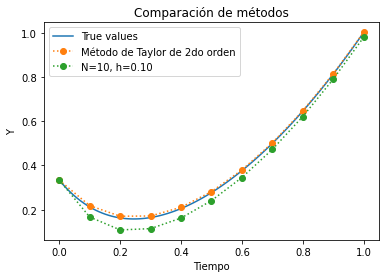

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(t_true, y_true, label="True values")

# Plotting

plt.plot(
    ts_nth, ys_nth, marker="o", linestyle=":", label="Método de Taylor de 2do orden"
)
Ns = [10]
for n in Ns:
    ys, ts, h = ODE_euler(a=a, b=b, y_t0=y_t0, f=f, N=n)
    plt.plot(ts, ys, marker="o", linestyle=":", label=f"N={n}, h={h:.2f}")
plt.xlabel("Tiempo")
plt.ylabel("Y")
plt.title("Comparación de métodos")
plt.legend()
plt.show()